## Importing Libraries

# DISCUSS: IMPORTING NUM-SUPERMARKETS WITH NEIGHBORHOOD; FLOOR 1 DUMMY

In [1]:
import pandas as pd
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

## Importing data

In [2]:
# Filling data path
train_data_path = "./data/train.csv"
test_data_path = "./data/test.csv"

# reading CSV file
df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

# Creating column to differentiate df_test and df_train
df_train['train_dummy'] = 1
df_test['train_dummy'] = 0


df = pd.concat([df_train, df_test], axis=0).sort_values("id").reset_index()

# EDA

In [3]:
# take a first look at df
display(df)

,index,id,num_rooms,num_baths,square_meters,orientation,year_built,door,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,price,train_dummy
0,597,1,3.0,3.0,126.0,east,2009.0,6º - 4a,True,True,Sant Martí,9.0,True,True,NaN,NaN,0
1,6521,2,4.0,3.0,154.0,NaN,2008.0,2º - 2a,True,True,Horta,0.0,True,True,NaN,1348.0,1
2,3404,3,1.0,3.0,140.0,NaN,2000.0,4º - 4a,False,True,Sants,6.0,NaN,False,NaN,1285.0,1
3,481,4,3.0,2.0,50.0,south,1984.0,1º - 2a,False,False,Sant Andreu,0.0,False,False,NaN,NaN,0
4,7628,5,3.0,3.0,106.0,south,1959.0,4º - 2a,True,True,Gràcia,1.0,True,True,NaN,1156.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3983,9996,4.0,3.0,51.0,west,1972.0,4º - 4a,False,False,Nou Barris,3.0,False,True,2.0,875.0,1
9996,1028,9997,3.0,3.0,134.0,NaN,1994.0,5º - 2a,False,False,Ciutat Vella,0.0,True,False,3.0,1108.0,1
9997,6572,9998,2.0,1.0,83.0,south,1950.0,9º - 4a,False,False,Les Cors,0.0,True,True,NaN,1083.0,1
9998,1767,9999,2.0,2.0,76.0,west,1998.0,1º - 2a,False,False,Nou Barris,4.0,True,True,3.0,NaN,0


In [4]:
# Data Exploration

# Describing Dataframe
shape = df.shape
print(f"The Dataframe has a shape of {shape[0]} rows and {shape[1]} columns.")
var_types=df.dtypes
print(f"\nThe variable types of the Dataframe are the following:")
display(var_types)

# Descriptives
print(f"\nThe descriptives of the Dataframe are the following:")
describe_df = df.describe()
display(describe_df)

The Dataframe has a shape of 10000 rows and 17 columns.

The variable types of the Dataframe are the following:


index                 int64
id                    int64
num_rooms           float64
num_baths           float64
square_meters       float64
orientation          object
year_built          float64
door                 object
is_furnished         object
has_pool             object
neighborhood         object
num_crimes          float64
has_ac               object
accepts_pets         object
num_supermarkets    float64
price               float64
train_dummy           int64
dtype: object


The descriptives of the Dataframe are the following:


,index,id,num_rooms,num_baths,square_meters,year_built,num_crimes,num_supermarkets,price,train_dummy
count,10000.000000,10000.00000,9809.000000,9800.000000,9802.000000,9800.000000,9800.000000,1785.000000,8000.000000,10000.00000
mean,3399.500000,5000.50000,3.175553,1.992449,108.104673,1985.358163,2.776122,1.984314,1099.616250,0.80000
std,2402.896303,2886.89568,7.067345,0.815294,38.442532,20.613132,3.436340,0.804124,271.686617,0.40002
min,0.000000,1.00000,1.000000,1.000000,-100.000000,1950.000000,0.000000,1.000000,195.000000,0.00000
25%,1249.750000,2500.75000,1.000000,1.000000,78.000000,1968.000000,0.000000,1.000000,905.750000,1.00000
50%,2999.500000,5000.50000,3.000000,2.000000,109.000000,1985.000000,1.000000,2.000000,1104.000000,1.00000
75%,5499.250000,7500.25000,4.000000,3.000000,139.750000,2003.000000,6.000000,3.000000,1295.000000,1.00000
max,7999.000000,10000.00000,99.000000,3.000000,170.000000,2021.000000,10.000000,3.000000,2095.000000,1.00000


In [162]:
# look at number of missing values
df.isna().sum()

index                  0
id                     0
num_rooms            191
num_baths            200
square_meters        198
orientation         2864
year_built           200
door                 200
is_furnished         200
has_pool             200
neighborhood         200
num_crimes           200
has_ac               200
accepts_pets         200
num_supermarkets    8215
price               2000
train_dummy            0
dtype: int64

### Looking at outliers 

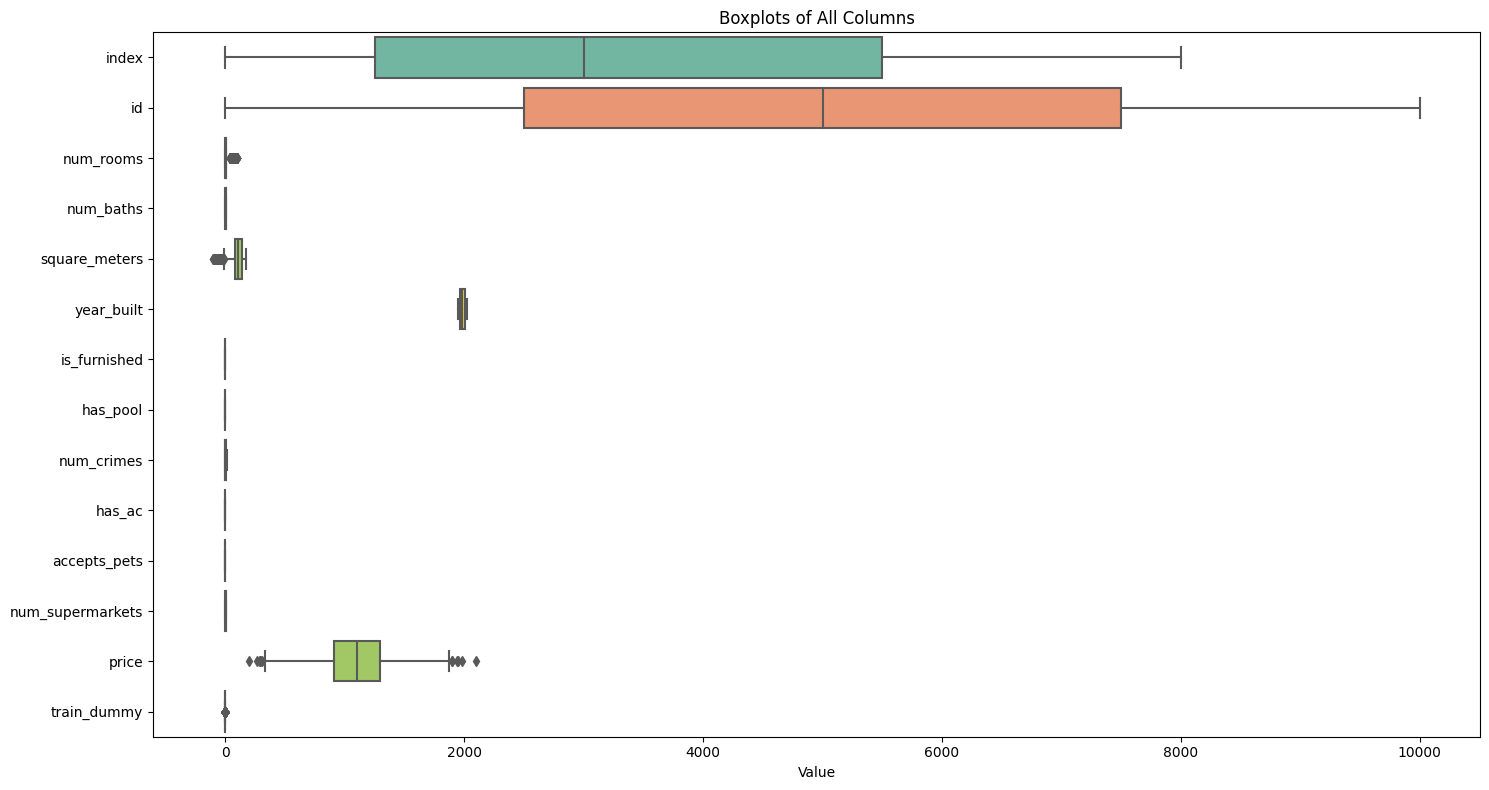

In [163]:
# look at outlier distribution

plt.figure(figsize=(15, 8))

sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplots of All Columns")
plt.xlabel("Value")

plt.tight_layout()

# Show the plot
plt.show()

because of different scales of columns it's hard to see the outliers sometimes -> create subplots

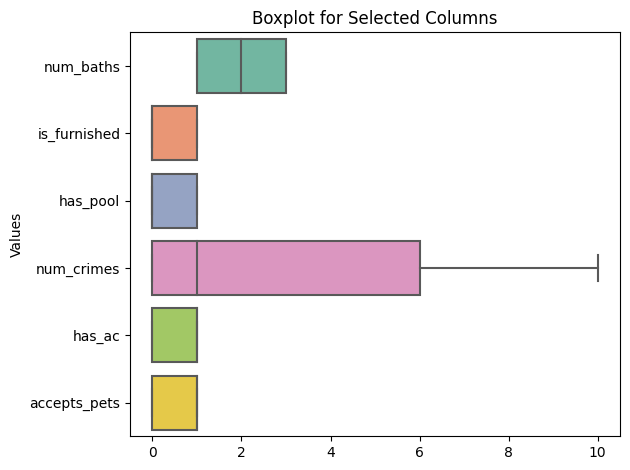

In [164]:
# Select the columns you want to include in the boxplot
selected_columns = ['num_baths', 'is_furnished', 'has_pool', 'num_crimes', 'has_ac', 'accepts_pets']


sns.boxplot(data=df[selected_columns], orient="h", palette="Set2")

plt.title("Boxplot for Selected Columns")
plt.ylabel("Values")

plt.tight_layout()

# Show the plot
plt.show()

no outliers in num_baths, is_furnished, has_pool, num_crimes, has_ac, accepts_pets

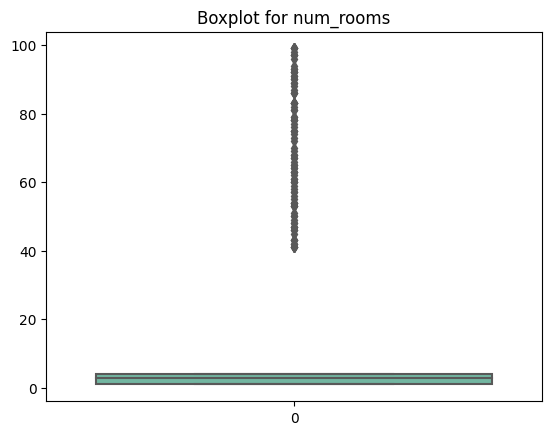

In [165]:
sns.boxplot(data=df['num_rooms'], palette="Set2")
plt.title("Boxplot for num_rooms")

# Show the plot
plt.show()

outliers in column num_rooms (as visivle in plot when num_rooms > 10)

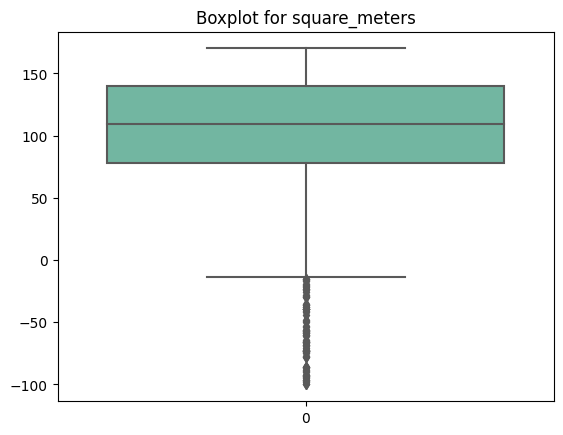

In [166]:
sns.boxplot(data=df['square_meters'], palette="Set2")
plt.title("Boxplot for square_meters")

# Show the plot
plt.show()

outliers in column square_meters: values < 0 (generally negative values fpr square meters make no sense)

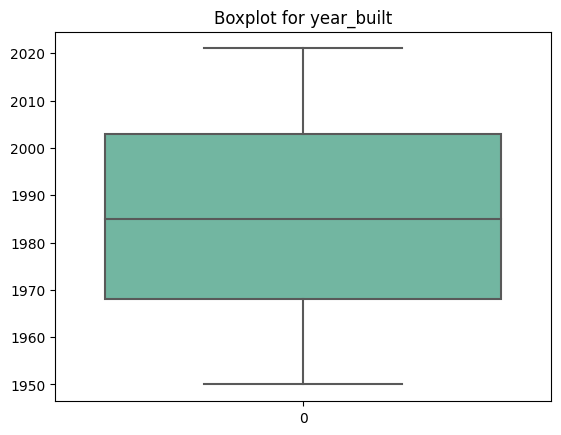

In [167]:
sns.boxplot(data=df['year_built'], palette="Set2")
plt.title("Boxplot for year_built")

# Show the plot
plt.show()

no outliers for year_built

### look at correlations between columns

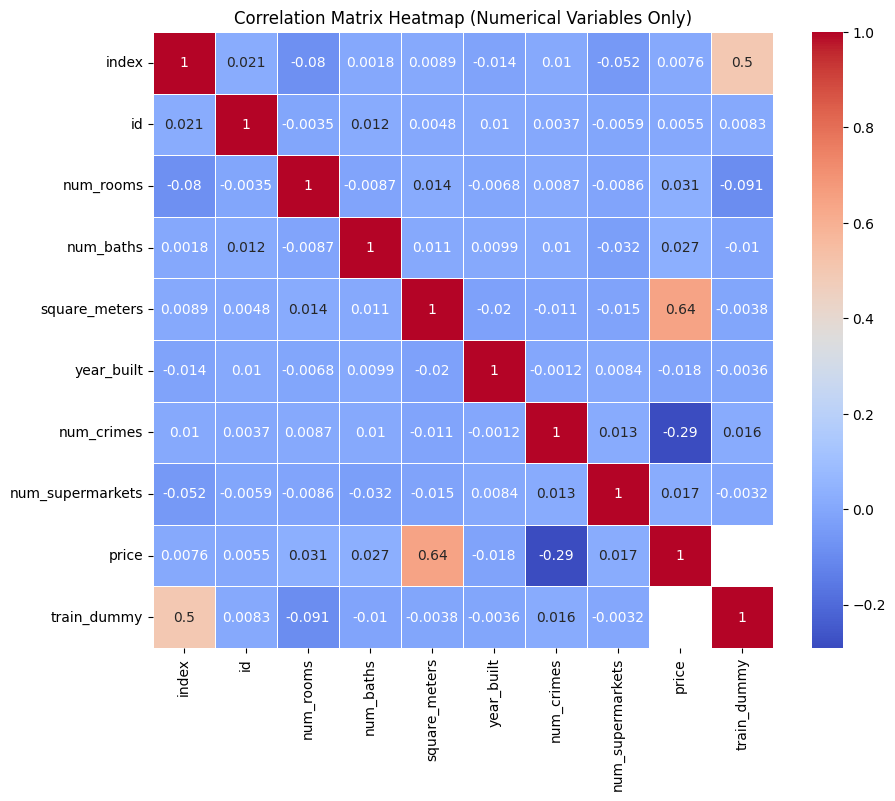

In [168]:
numerical_columns = df.select_dtypes(include=['number'])
correlation_matrix = numerical_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Numerical Variables Only)")
plt.show()

looks like square meters has the highest influence on price, followed by num_crimes, other than that no collinearity between other variables

more EDA in data cleaning if needed

## Data cleaning
- Creating Floor 1 Dummy
- Removing outliers from the num_rooms and square_meters
- imputing missing values
- encoding categorical variables neighborhood and orientation

In [5]:
print(df['orientation'].value_counts())
# change orientation 'soxth' to 'south'
df['orientation'].replace('soxth', 'south')

print(df['orientation'].isna().sum())
# missing values need to be filled, KNN only works with numerical values -> map orientations to numbers for KNN

def convert_orientation(orientation):
    mapping = {"north": 1, "east": 2, "south": 3, "west": 4}
    
    if pd.notna(orientation):
        return mapping.get(orientation) 
    else:
        return np.nan


# Map the function to the 'Direction' column to create a new column with numerical values
df['orientation'] = df['orientation'].map(convert_orientation)


orientation
west     1831
north    1787
south    1768
east     1749
soxth       1
Name: count, dtype: int64
2864


In [6]:
# Creating numerical floor variable to encode categorical variable
df['floor'] = df['door'].str.extract(r'(\d+)º').astype(float)
# Dropping door and door_num columns (justify: not influential)
df.drop('door', axis=1, inplace=True)


# Replacing the outliers with NaN in the number of rooms (justify cutoff value: outliers are very high above 10, see graph above)
df['num_rooms'] = df['num_rooms'].apply(lambda x: x if x<10 else np.nan)

# Replacing the values of square metres < 0 with NaN (justify cutoff value: outliers for values below 0, see graph above)
df.loc[df['square_meters'] < 0, 'square_meters'] = np.nan

## Standardizing and imputing

In [7]:
# Standardization
def imputing_missing(impute_df, vars_to_impute):
    standardizer = StandardScaler()
    impute_df[vars_to_impute] = standardizer.fit_transform(df[vars_to_impute])
    imputer = KNNImputer(n_neighbors=7)
    impute_df[vars_to_impute] = imputer.fit_transform(df[vars_to_impute])
    impute_df[vars_to_impute] = standardizer.inverse_transform(df[vars_to_impute])
    return impute_df

vars_to_impute = ['num_rooms', 'num_baths', 'square_meters', 'year_built', 'num_crimes', 'floor', 'has_ac', 'accepts_pets', 'is_furnished', 'has_pool', 'orientation']
df = imputing_missing(df, vars_to_impute)

In [8]:
# Re-standardising variables
to_standardize = ['num_rooms', 'num_baths', 'square_meters', 'year_built', 'num_crimes']

for i in to_standardize:
    df[i] = (df[i] - np.mean(df[i])) / np.std(df[i])

In [9]:
# transforming column orientation by one_hot_encoding to get rid of current ordinality for price prediction
print(df['orientation'].value_counts())

# round values to get "caregories" back
df['orientation'] = round(df['orientation'],0)

# remapping for easier One-hot-encoding
mapping = {1: "north", 2: "east", 3: "south", 4:"west"}

df['orientation'] = [mapping[value] for value in df['orientation']]

df = pd.get_dummies(df, columns=['orientation'], prefix=['orient']).reset_index(drop=True)

orientation
3.000000    1992
2.000000    1945
4.000000    1831
1.000000    1787
2.571429     336
2.285714     333
2.714286     311
2.142857     291
2.857143     254
2.428571     244
1.857143     134
3.142857     125
2.428571     109
3.285714      85
1.714286      72
3.571429      21
1.571429      19
3.428571      18
3.428571      14
2.571429      12
1.571429      11
2.857143      11
1.428571       9
3.142857       9
1.857143       7
2.714286       5
3.714286       5
2.142857       3
1.714286       2
1.285714       2
1.000000       1
1.285714       1
1.142857       1
Name: count, dtype: int64


#### Imputing neighborhood based on the number of crimes

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sant Martí'),
  Text(1, 0, 'Horta'),
  Text(2, 0, 'Sants'),
  Text(3, 0, 'Sant Andreu'),
  Text(4, 0, 'Gràcia'),
  Text(5, 0, 'Eixample'),
  Text(6, 0, 'Ciutat Vella'),
  Text(7, 0, 'Sarrià-Sant Gervasi'),
  Text(8, 0, 'Les Cors'),
  Text(9, 0, 'Nou Barris')])

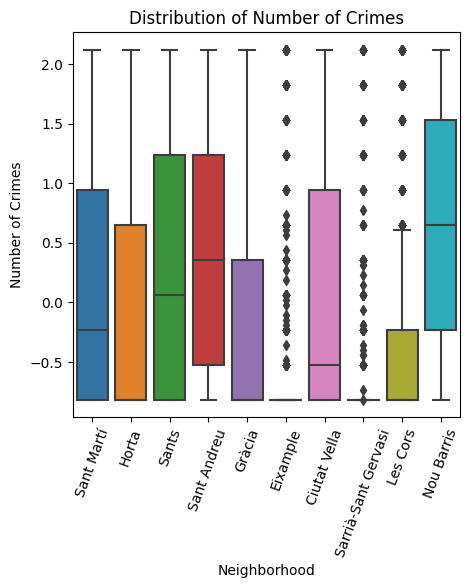

In [10]:
# 200 missing values in neighborhood need to be filled. First guess: neughborhoods differ by num_crimes

plt.figure(figsize=(5, 5))
sns.boxplot(data = df, x ='neighborhood', y = 'num_crimes')
plt.title('Distribution of Number of Crimes')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=70)

In [11]:
# because of high differences in mean of number of crimes per neighborhood: fill missing values for neighborhood based on the number of crimes for these rows

crimes_by_neighborhood = df.groupby('neighborhood')['num_crimes'].mean().to_dict()

# Function to be used in the imputation process
def find_closest_key(target, dictionary):
    closest_key = None
    closest_difference = float('inf')

    for key, value in dictionary.items():
        difference = abs(target - value)
        if difference < closest_difference:
            closest_key = key
            closest_difference = difference

    return closest_key

# Imputing neighborhood based on number of crimes
def impute_neighborhood(row):
    crimes = row['num_crimes']
    neighborhood = row['neighborhood']
    if pd.isnull(neighborhood):
        return find_closest_key(crimes, crimes_by_neighborhood)
    else:
        return neighborhood
    
df['neighborhood'] = df.apply(impute_neighborhood, axis=1)

#### Imputing number of supermarkets with mean of the neighborhood

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sant Martí'),
  Text(1, 0, 'Horta'),
  Text(2, 0, 'Sants'),
  Text(3, 0, 'Sant Andreu'),
  Text(4, 0, 'Gràcia'),
  Text(5, 0, 'Eixample'),
  Text(6, 0, 'Ciutat Vella'),
  Text(7, 0, 'Sarrià-Sant Gervasi'),
  Text(8, 0, 'Les Cors'),
  Text(9, 0, 'Nou Barris')])

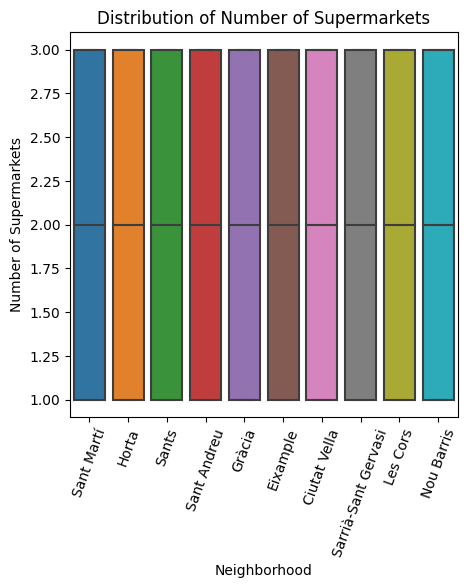

In [12]:
# first thought: number of supermarkets may depend on the neighborhood

plt.figure(figsize=(5, 5))
sns.boxplot(data = df, x ='neighborhood', y = 'num_supermarkets')
plt.title('Distribution of Number of Supermarkets')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Supermarkets')
plt.xticks(rotation=70)

we were thinking about mean per neighborhood, but all are very similiar -> drop the columns because approx. 80% missing values

In [13]:
# drop column num_supermarkets

df.drop(['num_supermarkets'], axis=1, inplace=True)

#### Closer look at floors

In [14]:
# after KNN also floats for 'floor' -> change that to integers
df['floor'] = round(df['floor'],0)

floor
1.0     1056.926531
2.0     1051.942172
3.0     1065.078283
4.0     1091.747170
5.0     1089.327626
6.0     1113.609840
7.0     1128.796818
8.0     1122.762452
9.0     1132.267399
10.0    1133.197500
Name: price, dtype: float64


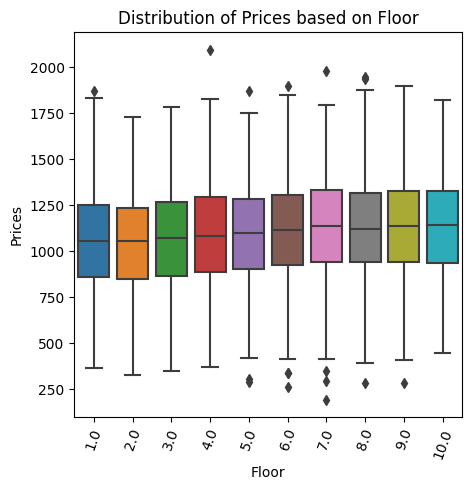

In [15]:
# looking at prices based on the floor
plt.figure(figsize=(5, 5))
sns.boxplot(data = df, x ='floor', y = 'price')
plt.title('Distribution of Prices based on Floor')
plt.xlabel('Floor')
plt.ylabel('Prices')
plt.xticks(rotation=70)

price_floor = df.groupby('floor')['price'].mean()
print(price_floor)

#### encode column neighborhood

In [16]:
df = pd.get_dummies(df, columns=['neighborhood'], prefix=['neigh']).reset_index(drop=True)

In [17]:
# check that all missing values are imputed before modelling
df.isna().sum()

index                           0
id                              0
num_rooms                       0
num_baths                       0
square_meters                   0
year_built                      0
is_furnished                    0
has_pool                        0
num_crimes                      0
has_ac                          0
accepts_pets                    0
price                        2000
train_dummy                     0
floor                           0
orient_east                     0
orient_north                    0
orient_south                    0
orient_west                     0
neigh_Ciutat Vella              0
neigh_Eixample                  0
neigh_Gràcia                    0
neigh_Horta                     0
neigh_Les Cors                  0
neigh_Nou Barris                0
neigh_Sant Andreu               0
neigh_Sant Martí                0
neigh_Sants                     0
neigh_Sarrià-Sant Gervasi       0
dtype: int64

#### Seperating the dfs for training and testing

In [18]:
# Seperating test and train
X_train = df[df['train_dummy'] == 1][['num_rooms', 'num_baths', 'square_meters', 'year_built', 'floor', 'num_crimes', 'neigh_Ciutat Vella', 'neigh_Eixample', 'neigh_Gràcia', 'neigh_Horta', 'neigh_Les Cors', 'neigh_Nou Barris', 'neigh_Sant Andreu', 'neigh_Sant Martí', 'neigh_Sants', 'neigh_Sarrià-Sant Gervasi', 'is_furnished', 'has_pool', 'has_ac', 'accepts_pets', 'orient_north' , 'orient_east', 'orient_south', 'orient_west']]
y_train = df[df['train_dummy'] == 1][['price']]

X_test = df[df['train_dummy'] == 0][['num_rooms', 'num_baths', 'square_meters', 'year_built', 'floor', 'num_crimes', 'neigh_Ciutat Vella', 'neigh_Eixample', 'neigh_Gràcia', 'neigh_Horta', 'neigh_Les Cors', 'neigh_Nou Barris', 'neigh_Sant Andreu', 'neigh_Sant Martí', 'neigh_Sants', 'neigh_Sarrià-Sant Gervasi', 'is_furnished', 'has_pool', 'has_ac', 'accepts_pets', 'orient_north' , 'orient_east', 'orient_south', 'orient_west']]

In [19]:
# Creating function for cross validation

def prediction_accuracy(X_train, y_train, model):
    mse_list = []
    num_of_predictions = 1000
    for i in range (num_of_predictions):
        X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_train, y_train, test_size= 0.2)

        model.fit(X_train_temp, y_train_temp)

        y_pred = model.predict(X_test_temp)
        mse = mean_squared_error(y_test_temp, y_pred)
        mse_list.append(mse)
    return sum(mse_list) / len(mse_list)


## Model Training and Cross Validation

In [20]:
# Test linear regression model
lin_model = LinearRegression()
print(prediction_accuracy(X_train, y_train, lin_model))

29493.73532154927


In [21]:
feature_names = X_train.columns
feature_values = lin_model.coef_

linear_coeff = pd.DataFrame(feature_values, columns=feature_names)

# Transpose the DataFrame to have feature names as the index and values as columns
linear_coeff = linear_coeff.transpose()
linear_coeff.columns = ['Value']
linear_coeff['Value'] = linear_coeff['Value'].apply(lambda x: '{:.2f}'.format(x))

# Print the DataFrame
print(linear_coeff)

                            Value
num_rooms                   15.47
num_baths                    7.81
square_meters              193.56
year_built                  -1.35
floor                       10.55
num_crimes                 -76.15
neigh_Ciutat Vella           2.89
neigh_Eixample               3.57
neigh_Gràcia                 5.68
neigh_Horta                  3.98
neigh_Les Cors               1.72
neigh_Nou Barris            -1.17
neigh_Sant Andreu           -8.65
neigh_Sant Martí            -4.50
neigh_Sants                 -1.01
neigh_Sarrià-Sant Gervasi   -2.50
is_furnished                -2.34
has_pool                     4.40
has_ac                       7.84
accepts_pets                -4.19
orient_north                -2.00
orient_east                  1.93
orient_south                -0.96
orient_west                  1.02


In [22]:
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_train, y_train, test_size= 0.2)

# Define a range of alpha values to try
alphas = np.logspace(-10, 0, 50)

# Initialize variables to store the best alpha and minimum MSE
best_alpha_lasso = None
best_alpha_ridge = None
min_mse_lasso = float('inf')
min_mse_ridge = float('inf')

# Loop over the alpha values and fit Lasso and Ridge models
for alpha in alphas:
    # Fit Lasso model
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_temp, y_train_temp)
    y_pred_lasso = lasso.predict(X_test_temp)
    mse_lasso = mean_squared_error(y_test_temp, y_pred_lasso)

    # Update best alpha and minimum MSE for Lasso
    if mse_lasso < min_mse_lasso:
        min_mse_lasso = mse_lasso
        best_alpha_lasso = alpha

    # Fit Ridge model
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_temp, y_train_temp)
    y_pred_ridge = ridge.predict(X_test_temp)
    mse_ridge = mean_squared_error(y_test_temp, y_pred_ridge)

    # Update best alpha and minimum MSE for Ridge
    if mse_ridge < min_mse_ridge:
        min_mse_ridge = mse_ridge
        best_alpha_ridge = alpha

# Print the best alpha and minimum MSE for Lasso and Ridge
print("Best alpha for Lasso:", round(best_alpha_lasso,3))
print("Minimum MSE for Lasso:", round(min_mse_lasso,3))
print()
print("Best alpha for Ridge:", round(best_alpha_ridge,3))
print("Minimum MSE for Ridge:", round(min_mse_ridge,3))


C:\Users\vanes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.258e+06, tolerance: 4.701e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\vanes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.258e+06, tolerance: 4.701e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\vanes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loca

Best alpha for Lasso: 1.0
Minimum MSE for Lasso: 30738.033

Best alpha for Ridge: 1.0
Minimum MSE for Ridge: 30846.394


In [23]:
# Test lasso regression model with best alpha
lasso_model = Lasso(alpha=best_alpha_lasso)
print(prediction_accuracy(X_train, y_train, lasso_model))

29367.08036890919


In [24]:
lasso = Lasso(alpha=best_alpha_lasso)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [25]:
print("Lasso Coefficients:")
for feature, coefficient in zip(X_train.columns, lasso.coef_):
    print(feature, ":", round(coefficient,2))

Lasso Coefficients:
num_rooms : 15.0
num_baths : 7.08
square_meters : 191.54
year_built : -0.21
floor : 10.14
num_crimes : -74.6
neigh_Ciutat Vella : 0.0
neigh_Eixample : 0.0
neigh_Gràcia : 0.0
neigh_Horta : 0.0
neigh_Les Cors : 0.0
neigh_Nou Barris : 0.0
neigh_Sant Andreu : -0.0
neigh_Sant Martí : -0.0
neigh_Sants : -0.0
neigh_Sarrià-Sant Gervasi : 0.0
is_furnished : 0.0
has_pool : 2.84
has_ac : 4.16
accepts_pets : -0.0
orient_north : 0.0
orient_east : 0.0
orient_south : -0.0
orient_west : 0.0


In [26]:
# Test Ridge regression model with best alpha
ridge_model = Ridge(alpha=best_alpha_ridge)
print(prediction_accuracy(X_train, y_train, ridge_model))

29448.56826900213


In [27]:
ridge.fit(X_train, y_train)
feature_names = X_train.columns
feature_values = ridge.coef_

ridge_coeff = pd.DataFrame(feature_values, columns=feature_names)

# Transpose the DataFrame to have feature names as the index and values as columns
ridge_coeff = ridge_coeff.transpose()
ridge_coeff.columns = ['Value']
ridge_coeff['Value'] = ridge_coeff['Value'].apply(lambda x: '{:.2f}'.format(x))

# Print the DataFrame
print(ridge_coeff)

                            Value
num_rooms                   15.96
num_baths                    8.09
square_meters              192.60
year_built                  -1.17
floor                       10.29
num_crimes                 -74.82
neigh_Ciutat Vella           1.52
neigh_Eixample               3.59
neigh_Gràcia                 3.33
neigh_Horta                  0.87
neigh_Les Cors               3.17
neigh_Nou Barris             0.52
neigh_Sant Andreu           -4.62
neigh_Sant Martí            -4.92
neigh_Sants                 -3.67
neigh_Sarrià-Sant Gervasi    0.21
is_furnished                 1.53
has_pool                     6.91
has_ac                       8.24
accepts_pets                -2.31
orient_north                 0.00
orient_east                  1.23
orient_south                -1.68
orient_west                  0.45


As you can see, the cross validation shows that the Lasso regression has the lowest MSE score, followed by linear regression and ridge which has the highest MSE.
By looking at the coefficients you can clearly see that Lasso solved the collinearity between the features by seeting some of the coefficents to 0. These include all neighborhood variables except for Sant Marti. Probably because of the collinearity between neighborhood and num_crimes since we imputed the missing values in neighborhood based on that. Also all the variables for orientation are set to 0 now, as well as is_furnished.
Based on the coefficients you can say that square_meters has the highest impact on the apartment price, followed by num_crimes which has a negative effect. 

## Prediction

In [28]:
# Impletmenting LASSO with optimal alpha
lasso = Lasso(alpha=best_alpha_lasso)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

new_df = pd.DataFrame()
new_df['id'] = df[df['train_dummy'] == 0]['id']
new_df['pred'] = y_pred

#### Exporting data

In [29]:
new_df.to_csv('C:/Users/vanes/Desktop/BSE/Term 1/Computational Machine Learning/corrected_floor.csv', index=False)

# Methods that didn't improve the score

#### using mean of year_built to impute NAs instead of KNN

In [ ]:
# looking at year built
df['year_built'].hist()
plt.show()

# quite equally distributed
# look whether there are differences based on neighborhood
mean_year_per_neigh = df.groupby('neighborhood')['year_built'].mean()
print(mean_year_per_neigh)
# no differences, just impute mean of year built
df['year_built'] = df['year_built'].fillna(df['year_built'].mean())

#### changing the number of rooms for those with outliers in sqm_per_room

In [ ]:
mean_sqm_to_room = df.groupby('num_rooms')['square_meters'].mean()
print(mean_sqm_to_room)

# seems odd that the mean size of the apartments is nearly the same for all num_rooms
# creating a new variable: square meters per room and look at the outliers (only if square_meter is positive, closer look at negative values later)
def calculating_sqm_per_room(row):
    if row['square_meters'] > 0:
        return row['square_meters']/ row['num_rooms']
    else:
        row['sqm_per_room'] = pd.NA    
df['sqm_per_room'] = df.apply(calculating_sqm_per_room, axis=1)
sns.boxplot(data=df['sqm_per_room'], palette="Set2")
plt.show()

# outliers detected from boxplot, take a closer look

upper_bound = 100
print(upper_bound)
df[df['sqm_per_room']>upper_bound]['num_rooms'].value_counts()

# nearly all rows that have an outlier as sqm_per_room have only 1 room. This doesn't make sense. Change this data with mean of sqm_per_room of non outliers

median_sqm_per_room = df[df['sqm_per_room'] < upper_bound]['sqm_per_room'].median()
print(median_sqm_per_room)

def changing_num_rooms_in_outliers(row):
    if row['square_meters'] >0 and pd.notna(row['num_rooms']):
        if row['sqm_per_room'] < upper_bound:
            return row['num_rooms']
        else:
            return round(row['square_meters'] / median_sqm_per_room,0)
    else:
        return row['num_rooms']    
    
df['num_rooms'] = df.apply(changing_num_rooms_in_outliers, axis=1)

#### imputing binary variables with logistic regressions for each column

In [ ]:
# imputing binary variables with logistic regression

correlation_matrix = df.corr(method='pearson')

# Calculate the correlation of all columns with respect to the 'price' column
price_correlation = correlation_matrix['price']

price_correlation = price_correlation.drop('price')
plt.figure(figsize=(12, 8))
sns.heatmap(price_correlation.to_frame(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.show         

#order do impute (from lowest to highest correlation): has_pool, is_furnished, has_ac, accepts_pets

# imputing has_pool
df['has_pool'] = df['has_pool'].map({True: 1, False: 0})
df_train = df[df['has_pool'].notna()]
df_test = df[df['has_pool'].isna()]
X_train = df_train[['num_rooms', 'num_baths', 'square_meters', 'year_built', 'floor', 'num_crimes', 'num_supermarkets','neigh_Ciutat Vella', 'neigh_Eixample', 'neigh_Gràcia', 'neigh_Horta', 'neigh_Les Cors', 'neigh_Nou Barris', 'neigh_Sant Andreu', 'neigh_Sant Martí', 'neigh_Sants', 'neigh_Sarrià-Sant Gervasi']]
y_train = df_train['has_pool']
X_test = df_test[['num_rooms', 'num_baths', 'square_meters', 'year_built', 'floor', 'num_crimes', 'num_supermarkets','neigh_Ciutat Vella', 'neigh_Eixample', 'neigh_Gràcia', 'neigh_Horta', 'neigh_Les Cors', 'neigh_Nou Barris', 'neigh_Sant Andreu', 'neigh_Sant Martí', 'neigh_Sants', 'neigh_Sarrià-Sant Gervasi']]

# Create an instance of the Logistic Regression model
logreg = LogisticRegression()

# Fit the model to the data
logreg.fit(X_train, y_train)

# Predict the class labels
predicted_labels = logreg.predict(X_test)
df.loc[df['has_pool'].isna(), 'has_pool'] = predicted_labels


# imputing is_furnished
df['is_furnished'] = df['is_furnished'].map({True: 1, False: 0})
df_train = df[df['is_furnished'].notna()]
df_test = df[df['is_furnished'].isna()]
X_train = df_train[['num_rooms', 'num_baths', 'square_meters', 'year_built', 'floor', 'num_crimes', 'num_supermarkets','neigh_Ciutat Vella', 'neigh_Eixample', 'neigh_Gràcia', 'neigh_Horta', 'neigh_Les Cors', 'neigh_Nou Barris', 'neigh_Sant Andreu', 'neigh_Sant Martí', 'neigh_Sants', 'neigh_Sarrià-Sant Gervasi', 'has_pool']]
y_train = df_train['is_furnished']
X_test = df_test[['num_rooms', 'num_baths', 'square_meters', 'year_built', 'floor', 'num_crimes', 'num_supermarkets','neigh_Ciutat Vella', 'neigh_Eixample', 'neigh_Gràcia', 'neigh_Horta', 'neigh_Les Cors', 'neigh_Nou Barris', 'neigh_Sant Andreu', 'neigh_Sant Martí', 'neigh_Sants', 'neigh_Sarrià-Sant Gervasi', 'has_pool']]

# Create an instance of the Logistic Regression model
logreg = LogisticRegression()

# Fit the model to the data
logreg.fit(X_train, y_train)

# Predict the class labels
predicted_labels = logreg.predict(X_test)
df.loc[df['is_furnished'].isna(), 'is_furnished'] = predicted_labels


# imputing has_ac
df['has_ac'] = df['has_ac'].map({True: 1, False: 0})
df_train = df[df['has_ac'].notna()]
df_test = df[df['has_ac'].isna()]
X_train = df_train[['num_rooms', 'num_baths', 'square_meters', 'year_built', 'floor', 'num_crimes', 'num_supermarkets','neigh_Ciutat Vella', 'neigh_Eixample', 'neigh_Gràcia', 'neigh_Horta', 'neigh_Les Cors', 'neigh_Nou Barris', 'neigh_Sant Andreu', 'neigh_Sant Martí', 'neigh_Sants', 'neigh_Sarrià-Sant Gervasi', 'has_pool', 'is_furnished']]
y_train = df_train['has_ac']
X_test = df_test[['num_rooms', 'num_baths', 'square_meters', 'year_built', 'floor', 'num_crimes', 'num_supermarkets','neigh_Ciutat Vella', 'neigh_Eixample', 'neigh_Gràcia', 'neigh_Horta', 'neigh_Les Cors', 'neigh_Nou Barris', 'neigh_Sant Andreu', 'neigh_Sant Martí', 'neigh_Sants', 'neigh_Sarrià-Sant Gervasi', 'has_pool', 'is_furnished']]

# Create an instance of the Logistic Regression model
logreg = LogisticRegression()

# Fit the model to the data
logreg.fit(X_train, y_train)

# Predict the class labels
predicted_labels = logreg.predict(X_test)
df.loc[df['has_ac'].isna(), 'has_ac'] = predicted_labels


# imputing has_ac
df['accepts_pets'] = df['accepts_pets'].map({True: 1, False: 0})
df_train = df[df['accepts_pets'].notna()]
df_test = df[df['accepts_pets'].isna()]
X_train = df_train[['num_rooms', 'num_baths', 'square_meters', 'year_built', 'floor', 'num_crimes', 'num_supermarkets','neigh_Ciutat Vella', 'neigh_Eixample', 'neigh_Gràcia', 'neigh_Horta', 'neigh_Les Cors', 'neigh_Nou Barris', 'neigh_Sant Andreu', 'neigh_Sant Martí', 'neigh_Sants', 'neigh_Sarrià-Sant Gervasi', 'has_pool', 'is_furnished', 'has_ac']]
y_train = df_train['accepts_pets']
X_test = df_test[['num_rooms', 'num_baths', 'square_meters', 'year_built', 'floor', 'num_crimes', 'num_supermarkets','neigh_Ciutat Vella', 'neigh_Eixample', 'neigh_Gràcia', 'neigh_Horta', 'neigh_Les Cors', 'neigh_Nou Barris', 'neigh_Sant Andreu', 'neigh_Sant Martí', 'neigh_Sants', 'neigh_Sarrià-Sant Gervasi', 'has_pool', 'is_furnished', 'has_ac']]

# Create an instance of the Logistic Regression model
logreg = LogisticRegression()

# Fit the model to the data
logreg.fit(X_train, y_train)

# Predict the class labels
predicted_labels = logreg.predict(X_test)
df.loc[df['accepts_pets'].isna(), 'accepts_pets'] = predicted_labels

With imputing binary variables with logistic regression instead of KNN: MSE score increases to 30076.70033997275

-> better to use KNN

#### Winsorizing the outliers in price: only reduced MSE in traindata, MSE in kaggle was increased -> overfitting!

In [ ]:
# Windsorizing price outliers in train data
def winsorize(data, limits=(0.05, 0.05)):
    """
    Winsorize a dataset by replacing extreme values with less extreme values.

    Arguments:
    - data: 1-D array or list, the dataset to be winsorized.
    - limits: Tuple of two floats (lower, upper), representing the fraction of values to be replaced
              on each tail. Default is (0.05, 0.05), which replaces 5% of the values on each tail.

    Returns:
    - winsorized_data: 1-D array, the winsorized dataset.
    """
    # Copy the input data to avoid modifying the original array
    winsorized_data = np.copy(data)


    # Calculating the lower and upper limits for winsorization
    lower_limit = np.percentile(winsorized_data, limits[0] * 100)
    upper_limit = np.percentile(winsorized_data, 100 - limits[1] * 100)

    print('Lower limit:', lower_limit)
    print('Upper limit:', upper_limit)

    # Replacing values below the lower limit with the lower limit
    winsorized_data[winsorized_data < lower_limit] = lower_limit

    # Replacing values above the upper limit with the upper limit
    winsorized_data[winsorized_data > upper_limit] = upper_limit

    return winsorized_data

# Windsorizing the price variable
df_train['price'] = winsorize(df_train['price'].dropna(), limits=(0.05, 0.05))

#### feature engineering: creating the column 'sqm_per_room'

In [ ]:
df['sqm_per_room'] = df['square_meters'] / df['num_rooms']